In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import pylab

In [2]:
df = pd.read_csv("Cellphone.csv")

In [3]:
df.shape

(161, 14)

In [4]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('Product_id', axis = 1, inplace = True)

In [9]:
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [ ]:
scal = MinMaxScaler()
df1 = scal.fit_transform(df)
df = pd.DataFrame(df1, columns = df.columns)
df.head()

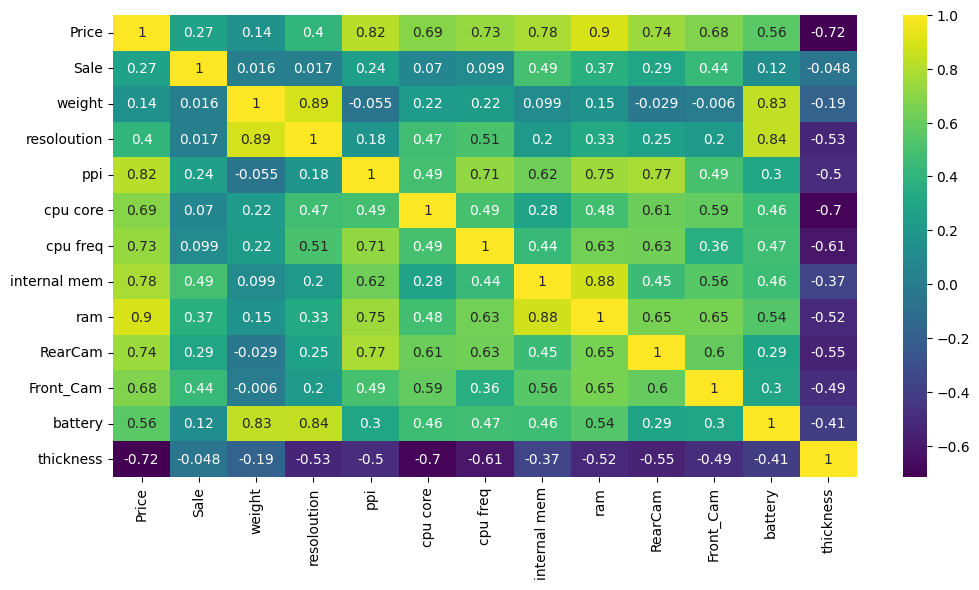

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

# Feature Selection:

In [11]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [12]:
calc_vif(df[[i for i in df.columns if i not in ['Price','resoloution','weight','ppi','cpu freq','Sale','cpu core']]])

,variables,VIF
0,internal mem,8.192004
1,ram,21.806225
2,RearCam,7.591519
3,Front_Cam,4.002244
4,battery,6.591475
5,thickness,3.670261


In [13]:
df.drop(['resoloution','weight','ppi','cpu freq','Sale','cpu core'], axis = 1, inplace = True)

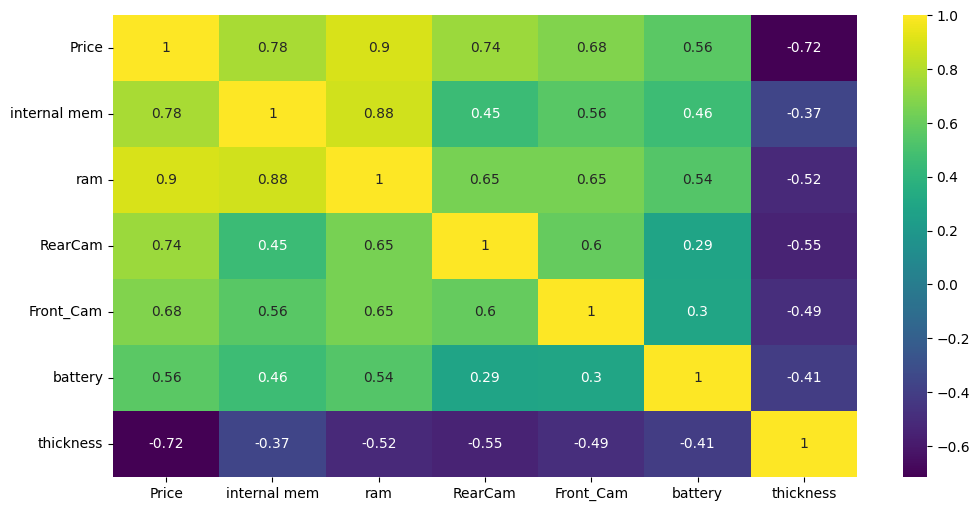

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

# Checking for Gaussion Distribution:

In [15]:
def plot_data(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(10, 4 * num_columns))
    
    for i, column in enumerate(df.columns):
        # Histogram
        sns.histplot(df[column], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram for {column}')
        
        # Probability plot
        stats.probplot(df[column], dist='norm', plot=axes[i, 1])
        axes[i, 1].set_title(f'Probability Plot for {column}')
    
    plt.tight_layout()
    plt.show()

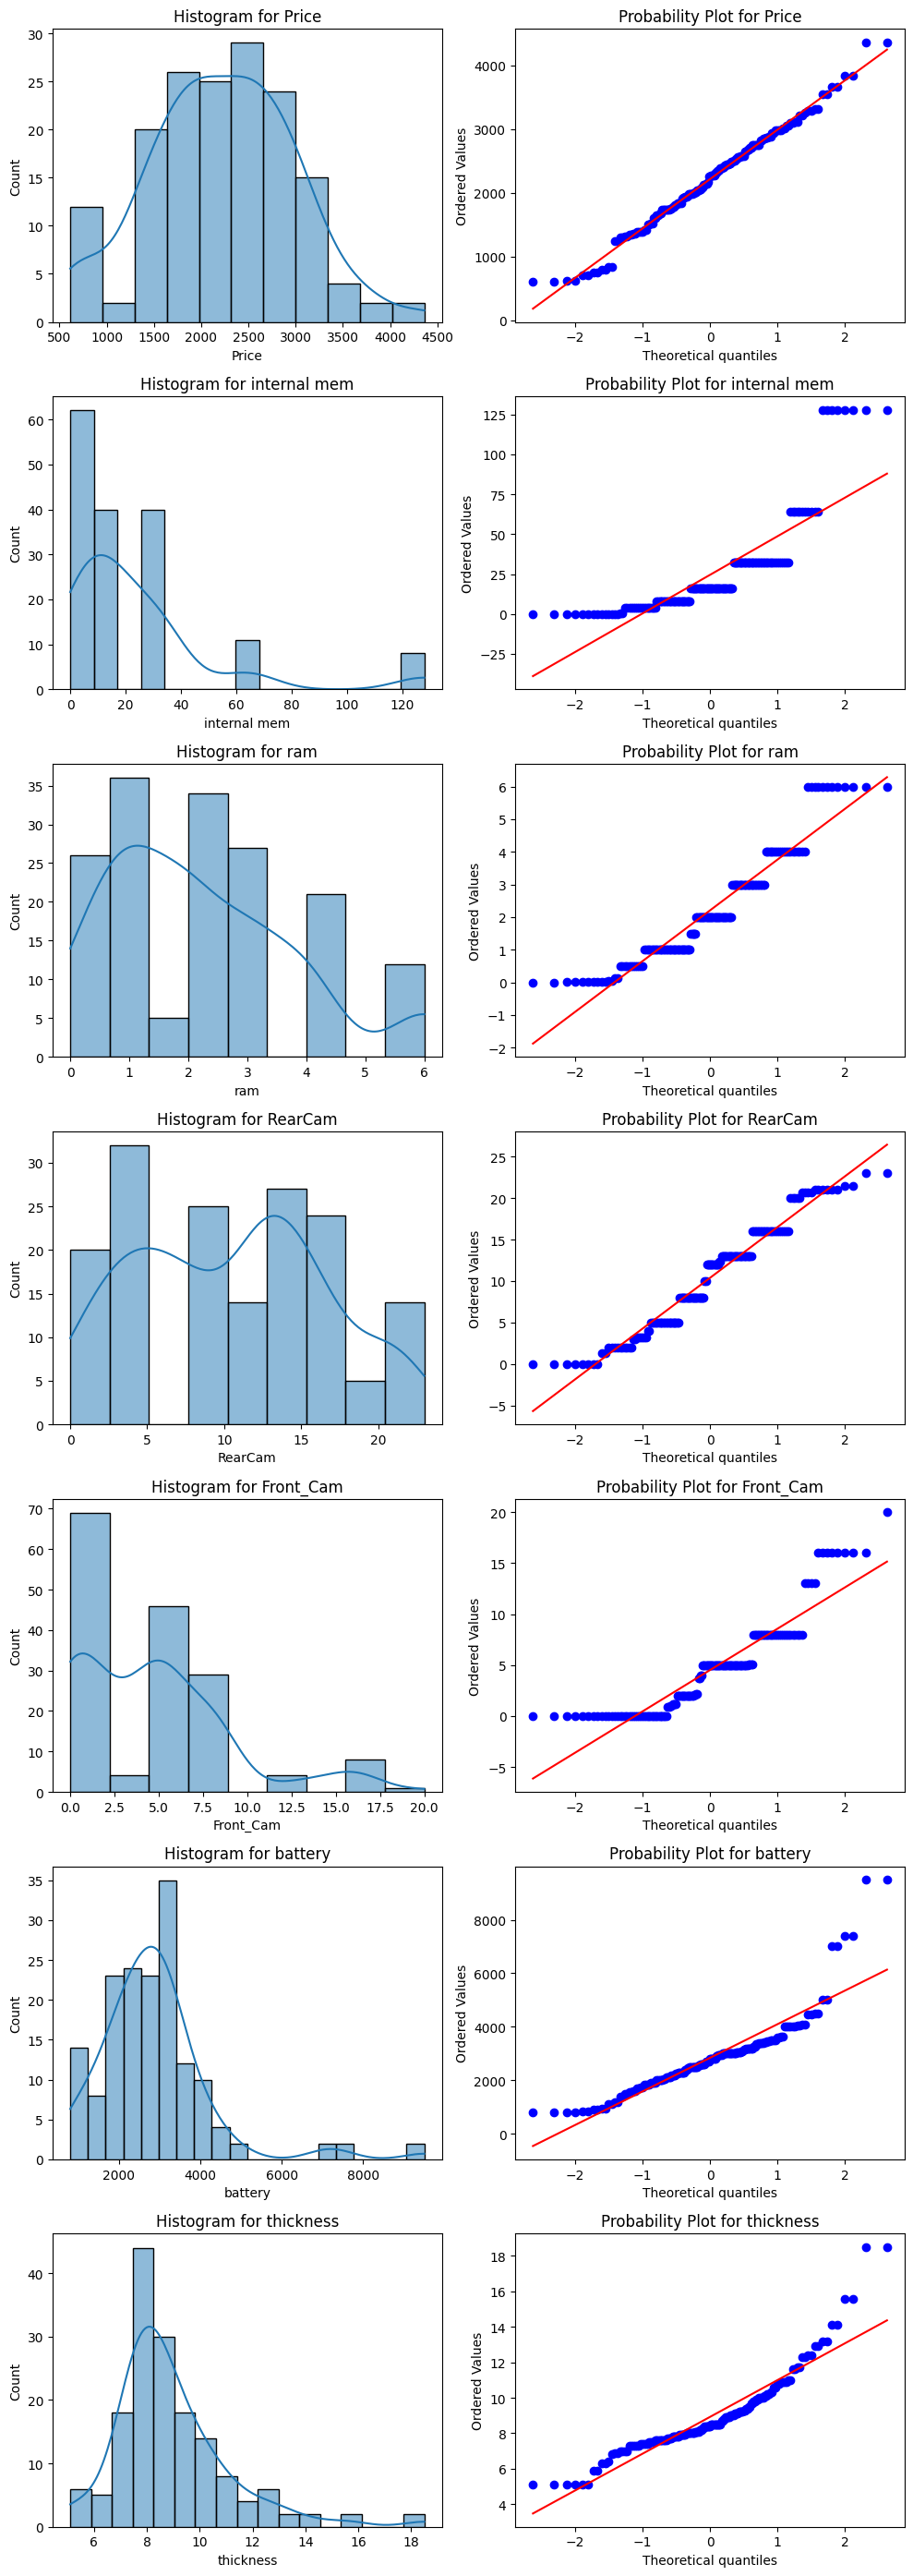

In [16]:
plot_data(df)

In [17]:
df.columns

Index(['Price', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery',
       'thickness'],
      dtype='object')

# Transformatio with 'yeo-johnson'

In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df= pd.DataFrame(pt.fit_transform(df), columns=df.columns)

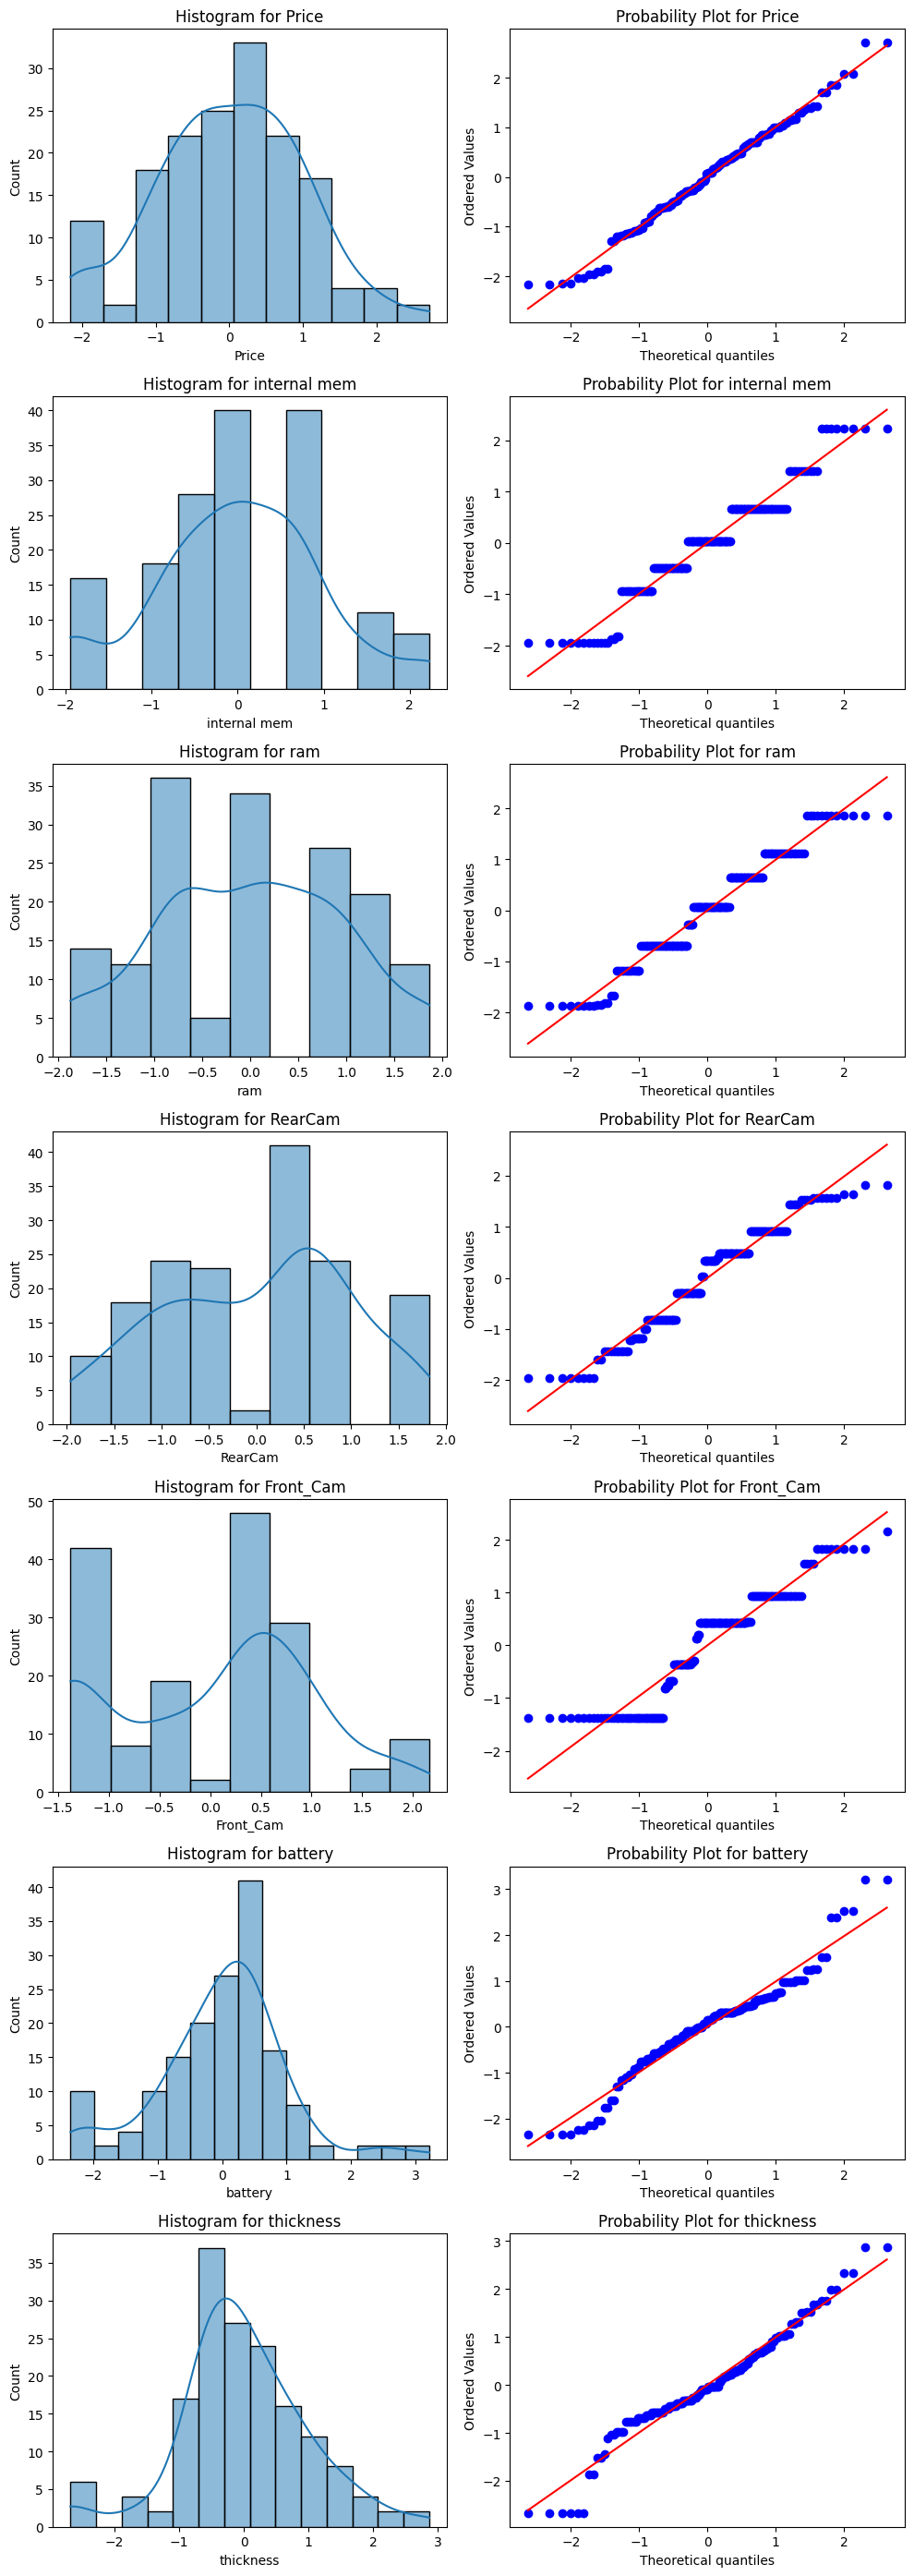

In [19]:
plot_data(df)

In [20]:
df.describe()

,Price,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,2.896234e-16,-4.082311e-16,1.351576e-16,-4.275393e-17,-7.723291e-17,1.401226e-15,-1.412259e-15
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00
min,-2.157354e+00,-1.942916e+00,-1.871355e+00,-1.961082e+00,-1.376959e+00,-2.350462e+00,-2.679703e+00
25%,-6.161059e-01,-4.972422e-01,-6.888474e-01,-8.182160e-01,-1.376959e+00,-5.377464e-01,-5.692986e-01
50%,7.069282e-02,3.992436e-02,7.483182e-02,3.369821e-01,4.214391e-01,1.496887e-01,-9.768264e-02
75%,6.954889e-01,6.698969e-01,6.516736e-01,9.093899e-01,9.340475e-01,4.802642e-01,5.843463e-01
max,2.714396e+00,2.227626e+00,1.863560e+00,1.823666e+00,2.161300e+00,3.210571e+00,2.869798e+00


df2 = df.copy()

df2[['internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery','thickness']] = np.log(df2[['internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery','thickness']])

plot_data(df2)

# Handel Outliers:

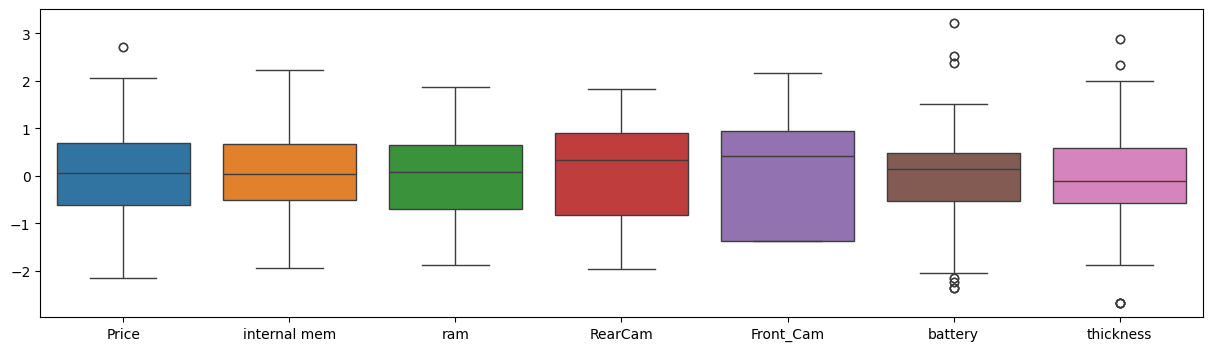

In [21]:
plt.figure(figsize=(15,4))
sns.boxplot(df)
plt.show()

In [22]:
def outlier_data(df):
    df_outlier = df.copy()
    for column in df.columns:
        upper_limit = df[column].mean() + 3*df[column].std()
        lower_limit = df[column].mean() - 3*df[column].std()
        
        df_outlier[column] = df_outlier[column].apply(lambda x: upper_limit if x > upper_limit else x)
        
        df_outlier[column] = df_outlier[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    return df_outlier   

In [23]:
df = outlier_data(df)

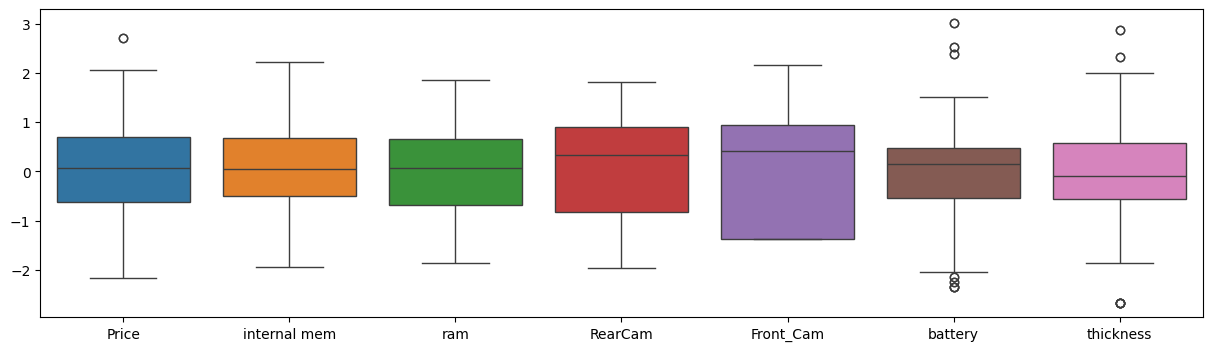

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot(df)
plt.show()

df2.replace([np.inf, -np.inf], 0, inplace=True)
df2.fillna(0, inplace = True)

In [25]:
df.describe()

,Price,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,161.000000,1.610000e+02
mean,2.896234e-16,-4.082311e-16,1.351576e-16,-4.275393e-17,-7.723291e-17,-0.002500,-1.412259e-15
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,0.995289,1.003120e+00
min,-2.157354e+00,-1.942916e+00,-1.871355e+00,-1.961082e+00,-1.376959e+00,-2.350462,-2.679703e+00
25%,-6.161059e-01,-4.972422e-01,-6.888474e-01,-8.182160e-01,-1.376959e+00,-0.537746,-5.692986e-01
50%,7.069282e-02,3.992436e-02,7.483182e-02,3.369821e-01,4.214391e-01,0.149689,-9.768264e-02
75%,6.954889e-01,6.698969e-01,6.516736e-01,9.093899e-01,9.340475e-01,0.480264,5.843463e-01
max,2.714396e+00,2.227626e+00,1.863560e+00,1.823666e+00,2.161300e+00,3.009360,2.869798e+00


# Split the data

In [26]:
from scipy.stats import zscore
x = df.drop('Price', axis = 1)
y = df['Price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Import Model and train it:-

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
model.score(x_train,y_train)

0.9158125714975757

In [31]:
model.score(x_test, y_test)

0.8893580358218836

In [32]:
y_pred = model.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.09222888981572025
RMSE : 0.3036920970583862
R2 : 0.8893580358218836
Adjusted R2 :  0.8735520409392955


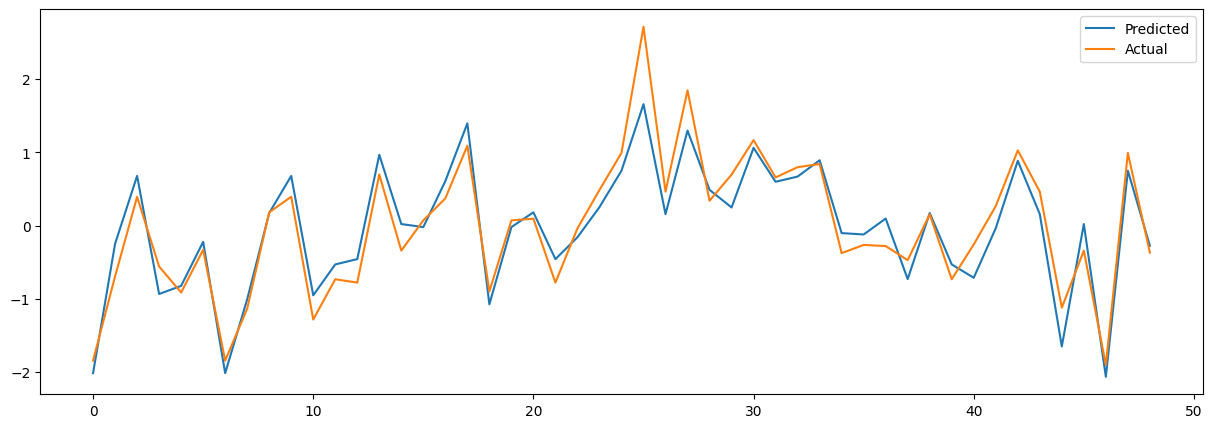

In [35]:
plt.figure(figsize=(15,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Hyperparameter Tuning

# Ridge Regression:-

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
r_model = Ridge()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,10,100,1000],
         'max_iter': [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]}
r_grid = GridSearchCV(r_model, param, scoring='neg_mean_squared_error', cv=5)
r_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                                   2, 10, 100, 1000],
                         'max_iter': [500, 1000, 1500, 2000, 2500, 3000, 3500,
                                      4000, 4500, 5000]},
             scoring='neg_mean_squared_error')

In [37]:
r_grid.best_params_

{'alpha': 2, 'max_iter': 500}

In [38]:
r_grid.best_score_

-0.09771516686856171

In [39]:
r_grid.score(x_test, y_test)

-0.09194036200751483

In [40]:
r_y_pred = r_grid.predict(x_test)

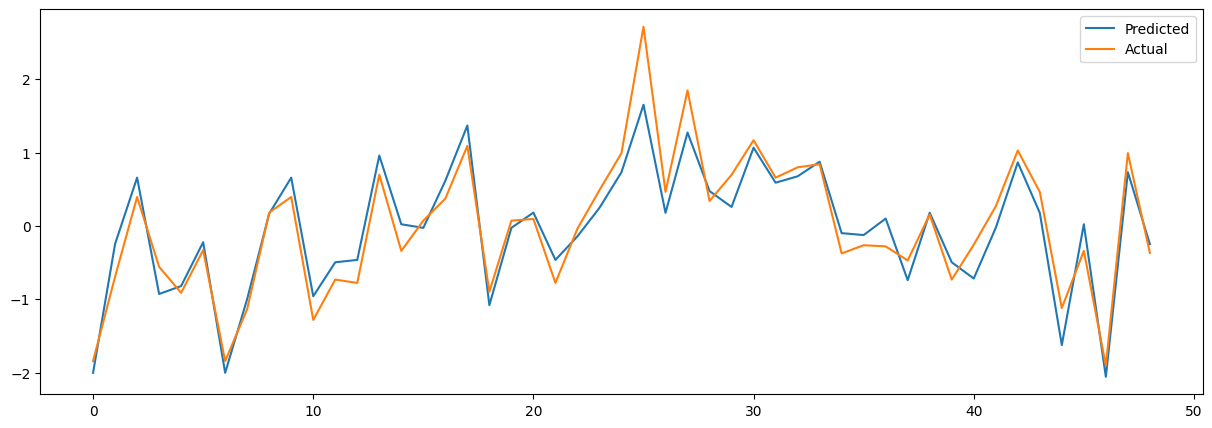

In [41]:
plt.figure(figsize=(15,5))
plt.plot(r_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [42]:
MSE  = mean_squared_error((y_test),(r_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(r_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (r_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.09194036200751483
RMSE : 0.30321669150545594
R2 : 0.8897041668821581
Adjusted R2 :  0.8739476192938951


# Lasso Regression:-

In [43]:
from sklearn.linear_model import Lasso
l_model = Lasso()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,10,100,1000],
        'max_iter': [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]}
l_grid = GridSearchCV(l_model, param, scoring='neg_mean_squared_error', cv=5)
l_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                                   2, 10, 100, 1000],
                         'max_iter': [500, 1000, 1500, 2000, 2500, 3000, 3500,
                                      4000, 4500, 5000]},
             scoring='neg_mean_squared_error')

In [44]:
l_grid.best_params_

{'alpha': 0.001, 'max_iter': 500}

In [45]:
l_grid.best_score_

-0.09820372801311344

In [46]:
l_grid.score(x_test, y_test)

-0.09189940528960328

In [47]:
l_y_pred = l_grid.predict(x_test)

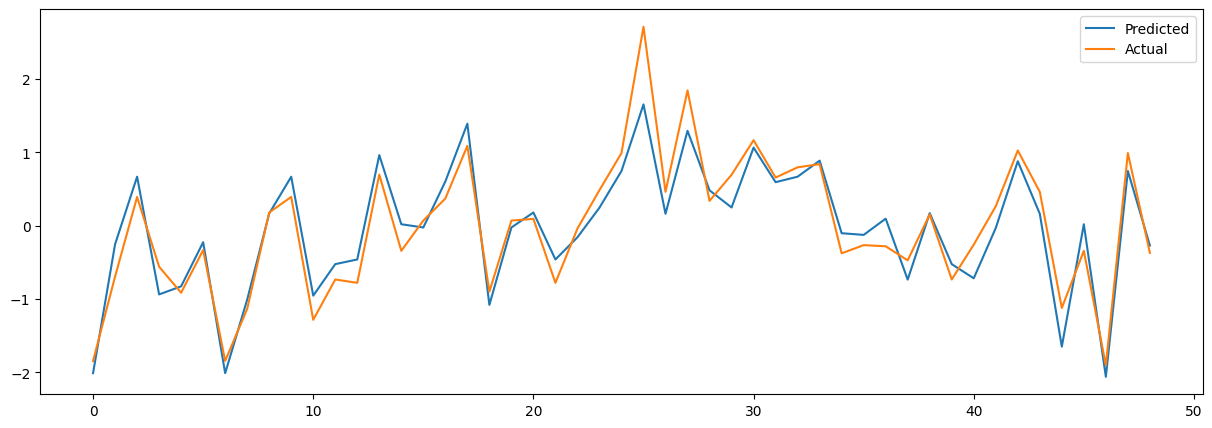

In [48]:
plt.figure(figsize=(15,5))
plt.plot(l_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [49]:
MSE  = mean_squared_error((y_test),(l_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(l_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (l_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.09189940528960328
RMSE : 0.30314914693860395
R2 : 0.8897533004207389
Adjusted R2 :  0.8740037719094158


# Elasticnet regression:-

In [50]:
from sklearn.linear_model import ElasticNet
el_model = ElasticNet()
param = {'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,10,100,1000],
         'l1_ratio':[0.01,0.001,0.0001,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1,2,3,4,5],
             'max_iter': [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]}
el_grid = GridSearchCV(el_model, param, scoring='neg_mean_squared_error', cv=5)
el_grid.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
4000 fits failed out of a total of 16000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1,
                                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                                   2, 10, 100, 1000],
                         'l1_ratio': [0.01, 0.001, 0.0001, 0.02, 0.03, 0.04,
                                      0.05, 0.06, 0.07, 0.08, 0.09, 1, 2, 3, 4,
                                      5],
                         'max_iter': [500, 1000, 1500, 2000, 2500, 3000, 3500,
                                      4000, 4500, 5000]},
             scoring='neg_mean_squared_error')

In [51]:
el_grid.score(x_test, y_test)

-0.09199342263702644

In [52]:
el_y_pred = el_grid.predict(x_test)

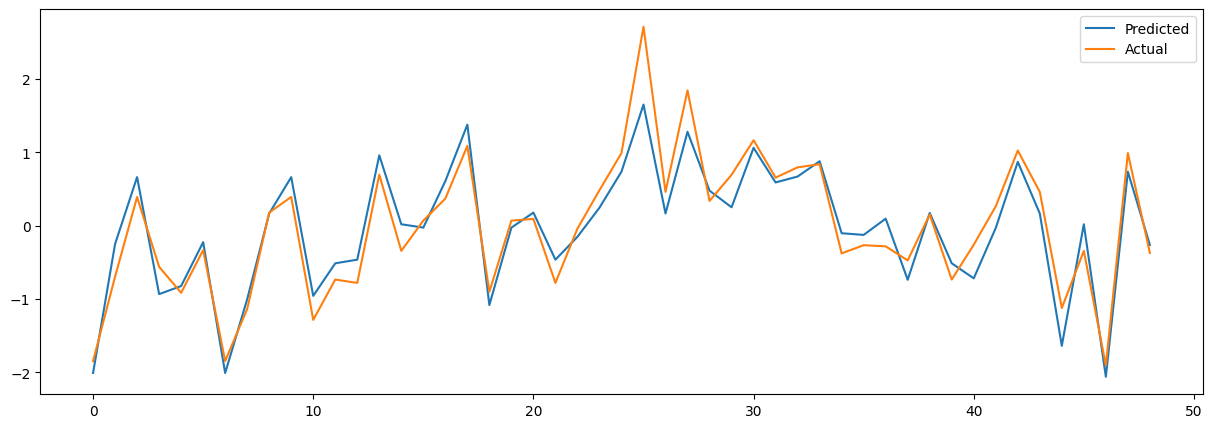

In [53]:
plt.figure(figsize=(15,5))
plt.plot(el_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [54]:
MSE  = mean_squared_error((y_test),(el_y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(el_y_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (el_y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.09199342263702644
RMSE : 0.30330417510648683
R2 : 0.8896405129416041
Adjusted R2 :  0.8738748719332619


# With Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
mtree = DecisionTreeRegressor()
mtree.fit(x_train,y_train)
y_t_pred = mtree.predict(x_test)

In [69]:
mtree.score(x_train,y_train)

1.0

In [68]:
mtree.score(x_test,y_test)

0.9509977090690295

In [70]:
MSE  = mean_squared_error((y_test),(y_t_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_t_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_t_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.04084731254151247
RMSE : 0.20210718082619547
R2 : 0.9509977090690295
Adjusted R2 :  0.9439973817931765


[Text(0.46017156862745096, 0.9615384615384616, 'x[1] <= -0.1\nsquared_error = 1.073\nsamples = 112\nvalue = 0.009'),
 Text(0.12908496732026145, 0.8846153846153846, 'x[4] <= -1.822\nsquared_error = 0.406\nsamples = 46\nvalue = -0.965'),
 Text(0.05228758169934641, 0.8076923076923077, 'x[5] <= 1.873\nsquared_error = 0.009\nsamples = 9\nvalue = -2.051'),
 Text(0.026143790849673203, 0.7307692307692307, 'x[4] <= -2.296\nsquared_error = 0.001\nsamples = 3\nvalue = -1.939'),
 Text(0.013071895424836602, 0.6538461538461539, 'squared_error = 0.0\nsamples = 1\nvalue = -1.904'),
 Text(0.0392156862745098, 0.6538461538461539, 'squared_error = 0.0\nsamples = 2\nvalue = -1.956'),
 Text(0.0784313725490196, 0.7307692307692307, 'x[2] <= -1.518\nsquared_error = 0.003\nsamples = 6\nvalue = -2.107'),
 Text(0.06535947712418301, 0.6538461538461539, 'x[2] <= -1.781\nsquared_error = 0.0\nsamples = 4\nvalue = -2.147'),
 Text(0.05228758169934641, 0.5769230769230769, 'squared_error = 0.0\nsamples = 2\nvalue = -2.15

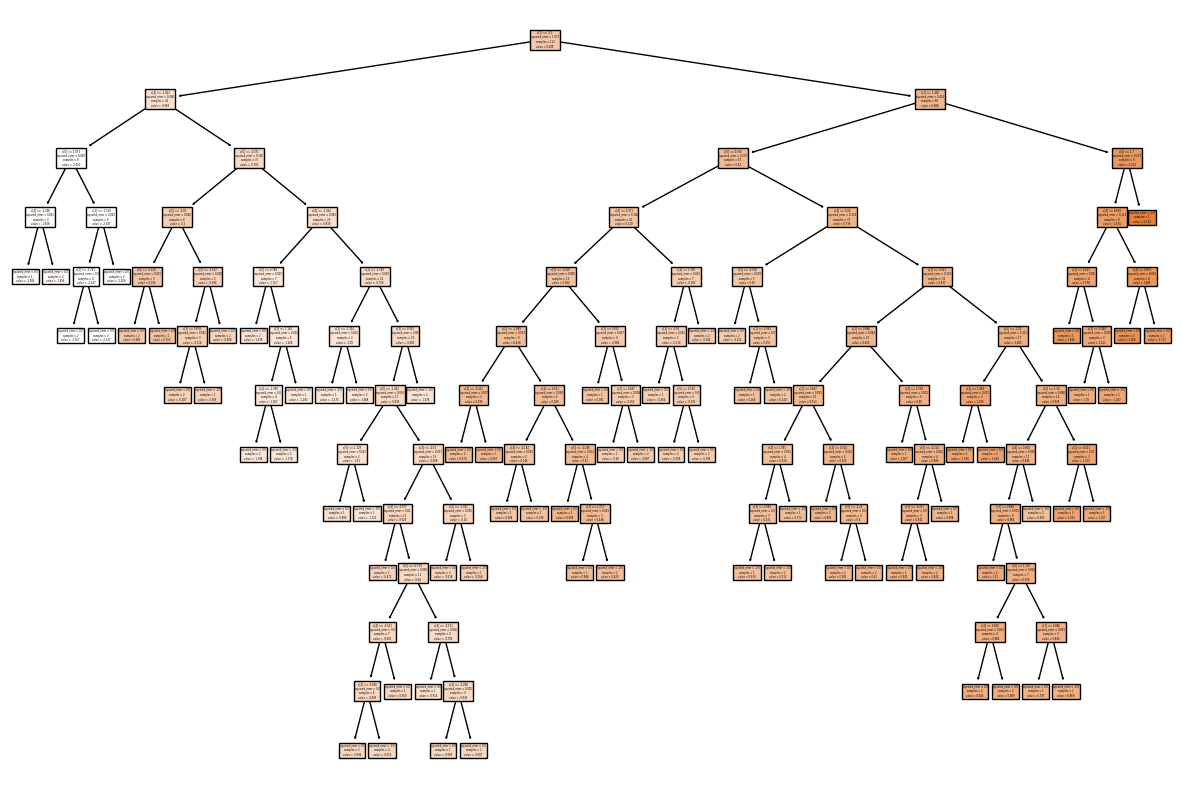

In [71]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(mtree, filled = True)

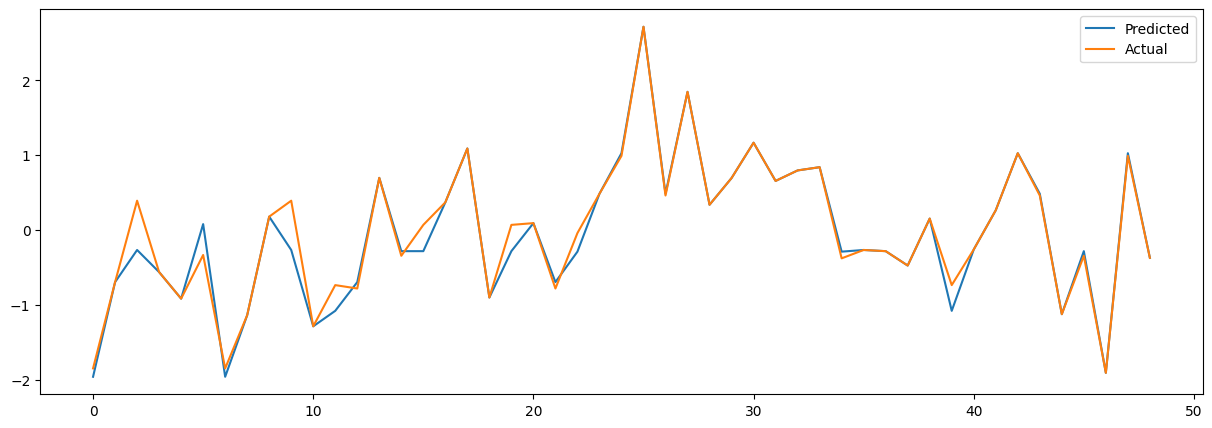

In [59]:
plt.figure(figsize=(15,5))
plt.plot(y_t_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# With SVM Regression

In [60]:
from sklearn.svm import SVR
smodel = SVR()
smodel.fit(x_train,y_train)
y_s_pred = smodel.predict(x_test)

In [61]:
smodel.score(x_train,y_train)

0.9404920586046437

In [62]:
smodel.score(x_test,y_test)

0.8790280364310035

In [63]:
MSE  = mean_squared_error((y_test),(y_s_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_s_pred))
print("R2 :" ,r2)

print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_s_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 0.10083976709628083
RMSE : 0.3175527784420738
R2 : 0.8790280364310035
Adjusted R2 :  0.8617463273497182


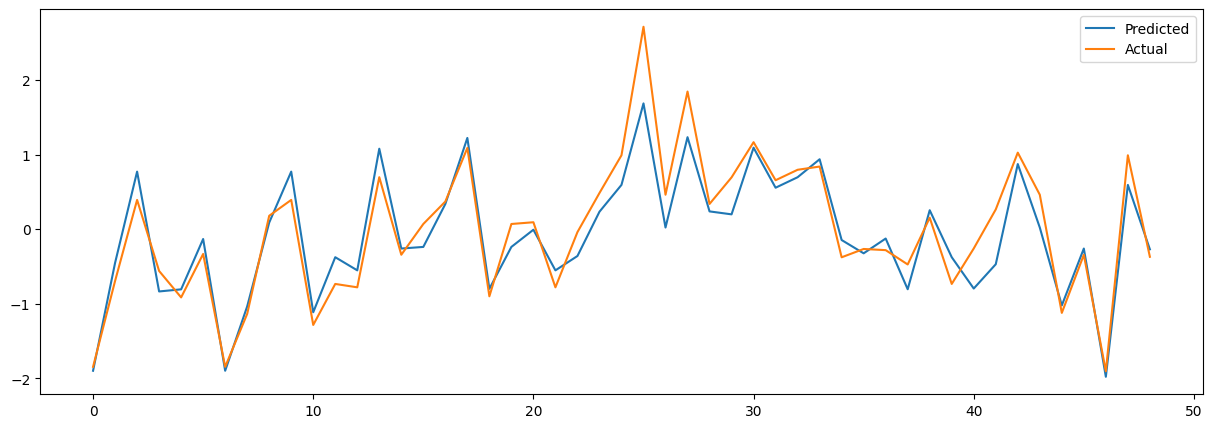

In [64]:
plt.figure(figsize=(15,5))
plt.plot(y_s_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()